### SVM on selected features by PCA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Numerical_train.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,OverallQual,OverallCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,3,65.0,8450,0,4,0,0,7,5,...,0,0,0,0,1,0,0,0,1,0
1,20,3,80.0,9600,0,4,0,0,6,8,...,0,0,0,0,1,0,0,0,1,0
2,60,3,68.0,11250,0,3,0,0,7,5,...,0,0,0,0,1,0,0,0,1,0
3,70,3,60.0,9550,0,3,0,0,7,5,...,0,0,0,0,1,0,0,0,0,0
4,60,3,84.0,14260,0,3,0,0,8,5,...,0,0,0,0,1,0,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 157 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(154)
memory usage: 1.8 MB


In [6]:
y = np.log(df['SalePrice'])
x = df.drop(labels = 'SalePrice', axis=1).astype("float64")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [7]:
pipe = Pipeline(steps= [('ss', StandardScaler()), ('pca', PCA(n_components=30)),('sss', StandardScaler()),('clf', SVR())])
param_grid = {'clf__C':[0.1, 0.5, 1.0, 1.5, 10,100, 150],'clf__kernel': ['linear', 'rbf', 'sigmoid', 'poly']}

In [8]:
search = GridSearchCV(pipe, param_grid, cv=5, iid=False, scoring='neg_mean_absolute_error',return_train_score=False)
search.fit(x, y)
print(search.best_params_)

C:\Users\admin1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [ ]:
svr = pipe.set_params(clf__C = 0.1, clf__kernel = 'linear')
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

In [23]:
svr.score(x_test,y_test)

0.8771781727812108

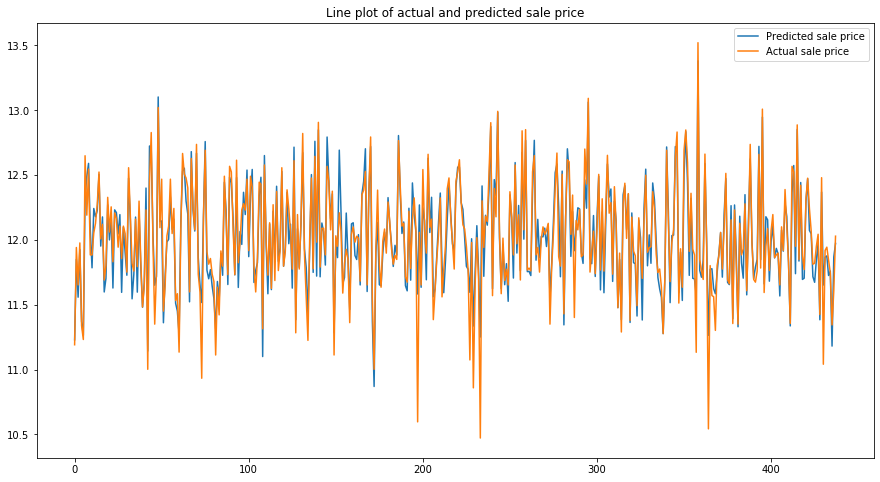

In [24]:
plt.figure(figsize=(15,8))
plt.plot((y_pred), label='Predicted sale price')
plt.plot((y_test.values), label='Actual sale price')
plt.title('Line plot of actual and predicted sale price')
plt.legend();